## Regression Neural Network for Students Scores predictions
| Tec. Univ. en Inteligencia Artificial
| Machine Learning II  

Team members:  
- López Ceratto, Julieta.  
- Rodríguez Griñó, Tomás.  
- Slepoy, David.  

## Description // Descripción
**EN**  
In this problem, a dataset is presented that contains information about the academic performance of university students, as well as various factors that may influence it. The objective is to build a regression model using neural networks to predict the students' academic performance index based on the provided features.

**ESP**  
En este problema, se presenta un conjunto de datos que contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él. El objetivo es construir un modelo de regresión utilizando redes neuronales para predecir el índice de rendimiento académico de los estudiantes basado en las características proporcionadas.

## Dataset

https://drive.google.com/file/d/1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc/view?usp=drive_link

**EN**  
The provided dataset includes the following variables for each student:
- **Hours Studied:** The total number of hours each student dedicated to studying.
- **Previous Scores:** The scores obtained by the students in previous exams.
- **Extracurricular Activities:** Whether the student participates in extracurricular activities (Yes or No).
- **Sleep Hours:** The average number of hours the student sleeps per day.
- **Sample Question Papers Practiced:** The number of sample question papers the student practiced with.

Additionally, the dataset includes the target variable:
- **Performance Index:** An index that represents the overall academic performance of each student, rounded to the nearest integer. This index ranges from 10 to 100, where higher values indicate better performance.

**ESP**  
El dataset proporcionado incluye las siguientes **variables** para cada estudiante:
- **Hours Studied**: El número total de horas dedicadas al estudio por cada estudiante.
- **Previous Scores**: Las puntuaciones obtenidas por los estudiantes en exámenes previos.
- **Extracurricular Activities:** Si el estudiante participa en actividades extracurriculares (Sí o No).
- **Sleep Hours:** El número promedio de horas de sueño que el estudiante tuvo por día.
- **Sample Question Papers Practiced:** El número de cuestionarios de muestra que el estudiante practicó.  

Además, el dataset incluye la **variable objetivo**:
- **Performance Index:** Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.


## Objective // Objetivo 
**EN**  
Using the provided dataset, the goal is to build a regression model using neural networks that can accurately predict the academic performance index of the students. The model should be trained and evaluated using appropriate validation techniques and regression evaluation metrics.

**ESP**  
Utilizando el dataset proporcionado, el objetivo es construir un modelo de regresión utilizando redes neuronales que pueda predecir con precisión el índice de rendimiento académico de los estudiantes. Se debe entrenar y evaluar el modelo utilizando técnicas adecuadas de validación y métricas de evaluación de regresión.


## 0.Librerías a utilizar y split dataset

In [1]:
%pip install pandas
%pip install numpy
%pip install gdown
%pip install zipfile
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for zipfile


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\julil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import gdown
import zipfile
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

### Carga y split dataset

In [3]:
url_zip_file = 'https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc&export=download'

#descarga de zip
df = gdown.download(url_zip_file, './data/students_performance.zip')

#extraccion de zip en variable df
with open(df , 'rb') as f:
    with zipfile.ZipFile(f) as z:
        # 3. Mostrar nombres de los archivos dentro del ZIP
        print(z.namelist())  # útil si no sabés el nombre exacto

        # 4. Leer el archivo CSV directamente en memoria
        with z.open(z.namelist()[0]) as csvfile:
            df = pd.read_csv(csvfile)

Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc&export=download
To: c:\Users\julil\OneDrive\Desktop\TecIA\3_anio\Aprendizaje Automatico II\NN_Students_Scores\data\students_performance.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 2.34MB/s]

['Student_Performance.csv']


In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
X = df.drop('Performance Index', axis = 1)
y = df['Performance Index']
print(f"Columnas X: {list(X.columns)}")
print(f"Target: {y.name}")

Columnas X: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
Target: Performance Index


In [94]:
# Dividir en conjunto de entrenamiento y conjunto de prueba+validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir X_val en conjunto de validación y prueba (50% de 30% para cada uno)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(f"filas X_train: {len(X_train)}")
print(f"filas X_val: {len(X_val)}")
print(f"filas X_test: {len(X_test)}")

filas X_train: 7000
filas X_val: 1500
filas X_test: 1500


#### Funciones de ploteo a utilizar

In [19]:
def plot_distribution(df, column):
    plt.figure(figsize=(15,10))
    
    if df[column].dtype == 'int64':
        # Histograma + KDE
        plt.subplot(2,2,1)
        sns.histplot(data=df, x=column, kde=True, bins='auto')
        plt.title(f'Histograma + KDE de {column}')
        
        # Boxplot + Violin
        plt.subplot(2,2,2)
        sns.boxplot(data=df, y=column)
        plt.title(f'Boxplot de {column}')

    else:
        plt.subplot(2,2,1)
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Distribución de {column}')

    plt.tight_layout()
    plt.show()
    print(df[column].describe())

## 1. Análisis previo y preprocesamiento del set de datos.

In [85]:
print(f"X train: {X_train.isna().any()}")
print(f"Y train: {y_train.isna().any()}")

print(f"X val: {X_val.isna().any()}")
print(f"Y val: {y_val.isna().any()}")

print(f"X test: {X_test.isna().any()}")
print(f"Y test: {y_test.isna().any()}")

X train: Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
dtype: bool
Y train: False
X val: Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
dtype: bool
Y val: False
X test: Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
dtype: bool
Y test: False


Constatamos que no hay datos nulos

### Análisis

Realizamos el análisis solo sobre el conjunto de train ya que se simula una situación real.

In [8]:
X_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,4.984571,69.602571,6.542000,4.619714
std,2.596511,17.340411,1.696826,2.867849
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,55.000000,5.000000,2.000000
50%,5.000000,69.500000,7.000000,5.000000
75%,7.000000,85.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


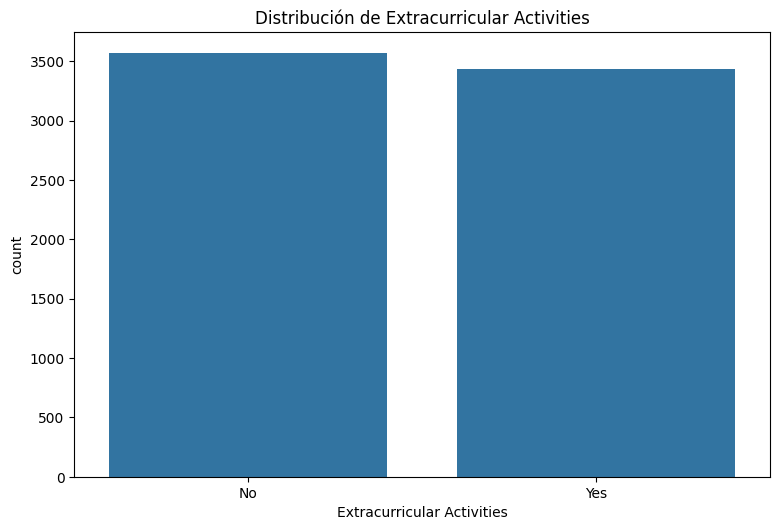

count     7000
unique       2
top         No
freq      3568
Name: Extracurricular Activities, dtype: object


In [20]:
plot_distribution(X_train, 'Extracurricular Activities')

La feature 'Extracurricular Activities', referida a si el alumno realizó actividades extracurriculares, es la única variable categórica. Tiene dos valores unicos "Yes" y "No", siendo este último a penas mayor en cantidad que el primero (3568 contra 3432)

#### Distribuciones por feature

Obtenemos las distribuciones para cada feature

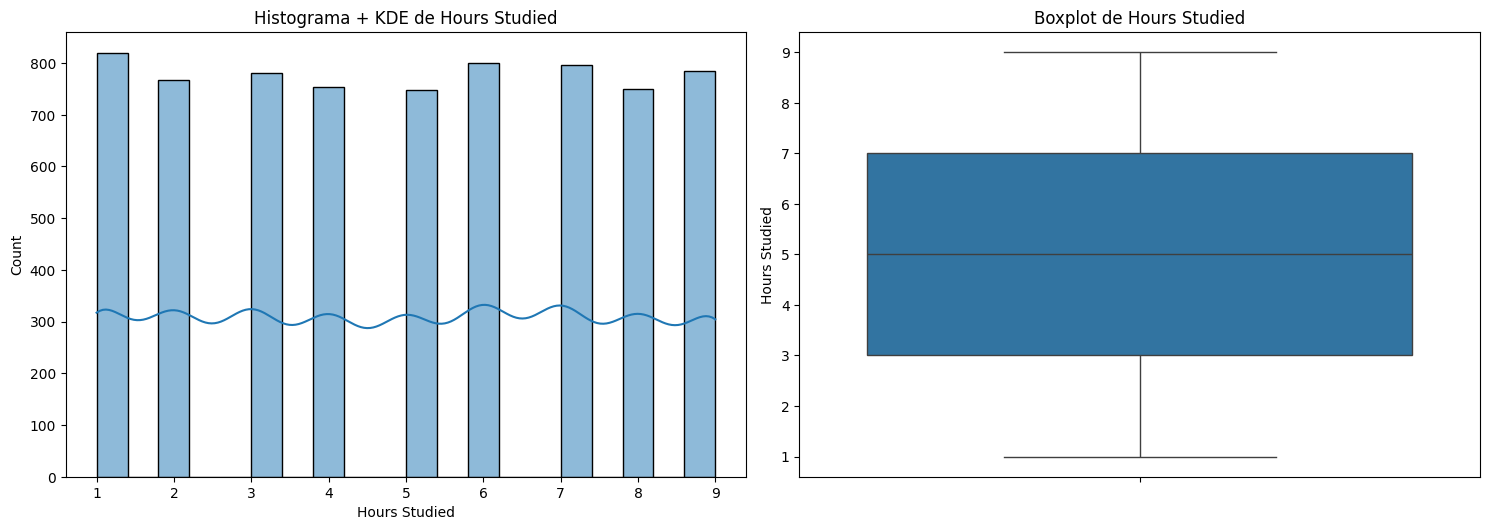

count    7000.000000
mean        4.984571
std         2.596511
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Hours Studied, dtype: float64


In [21]:
plot_distribution(X_train,'Hours Studied')

La variable numérica 'Hours Studied', referida a la cantidad de horas que estudió el alumno, posé una distribución normal. La media y mediana se encuentran casi iguales; los alumnos estudiaron en promedio 5hs y el 50% de los alumnos estudió 5hs o menos. Por otro lado, no presenta atípicos (algo que ya se podía desprender de lo indicado anteriormente). Su variación estandar es de 2.6hs, es decir, en promedio, las horas estudiadas por los alumnos tienden a desviarse 2.6 horas respecto a la media.  

Esto indica una dispersión moderada en los datos: si bien la mayoría de los estudiantes se agrupan en torno a las 5 horas de estudio, algunos se encuentran dentro de un rango razonablemente amplio, aproximadamente entre 2.4 y 7.6 horas (una desviación estándar por debajo y por encima de la media). Esta información confirma la consistencia de la distribución normal observada, dado que no hay presencia de valores extremos que alteren significativamente la forma de la distribución.

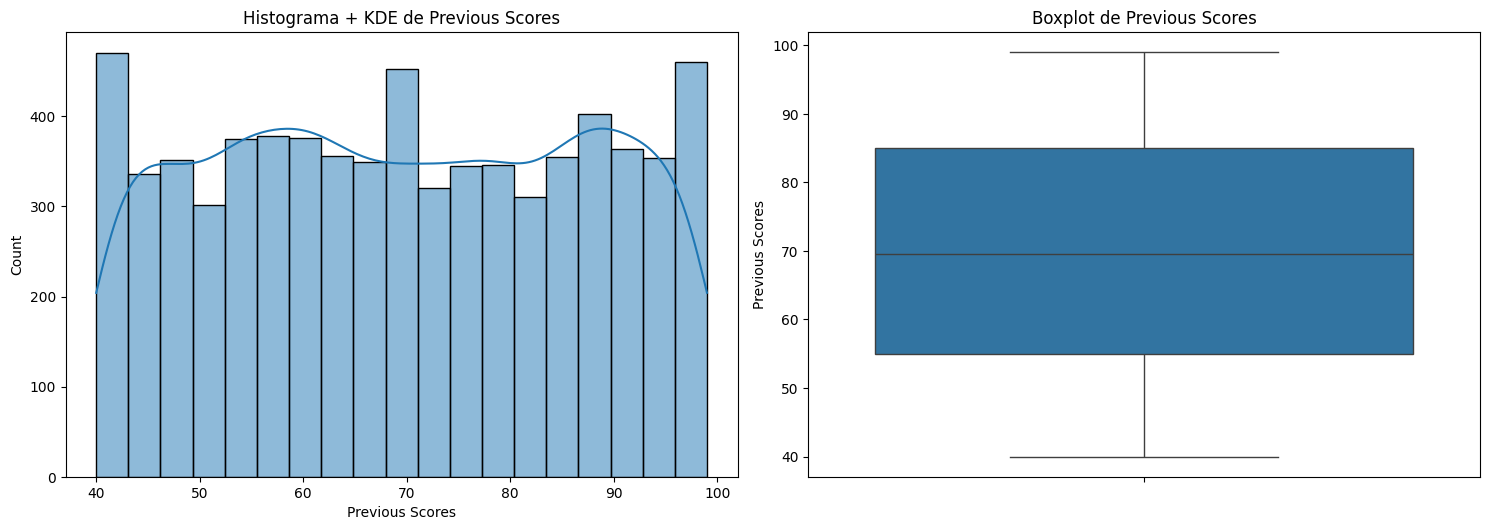

count    7000.000000
mean       69.602571
std        17.340411
min        40.000000
25%        55.000000
50%        69.500000
75%        85.000000
max        99.000000
Name: Previous Scores, dtype: float64


In [22]:
plot_distribution(X_train,'Previous Scores') 

La variable 'Previous Scores', en referencia a notas obtenidas anteriormente, presenta valores desde 40 a 99. De esto se desprende que, anteriormente y en el conjunto de train, ningun alumno obtuvo menos de 40 puntos y ningún alumno obtuvo 100. Por otro lado, si bien presenta una distribución tirando a normal, se pueden observar picos en las notas 40, 70 y 99; lo que quiere decir que estas notas son las más frecuentadas por los alumnos. 


Por otro lado, el promedio y la mediana son similares (69.60 y 69.5 respectivamente) lo que indica que, a demás de que la nota promedio sea 69.6 y que el 50% de los alumnos obtiene una nota menor o igual a 69.5, no hay presencia de atípicos (como también se visualiza en el boxplot de la derecha). Finalmente, el 50% de los alumnos obtuvo notas previas en el rango 55 a 85, el cual se podría considerar algo amplio en términos de notas de un examen.

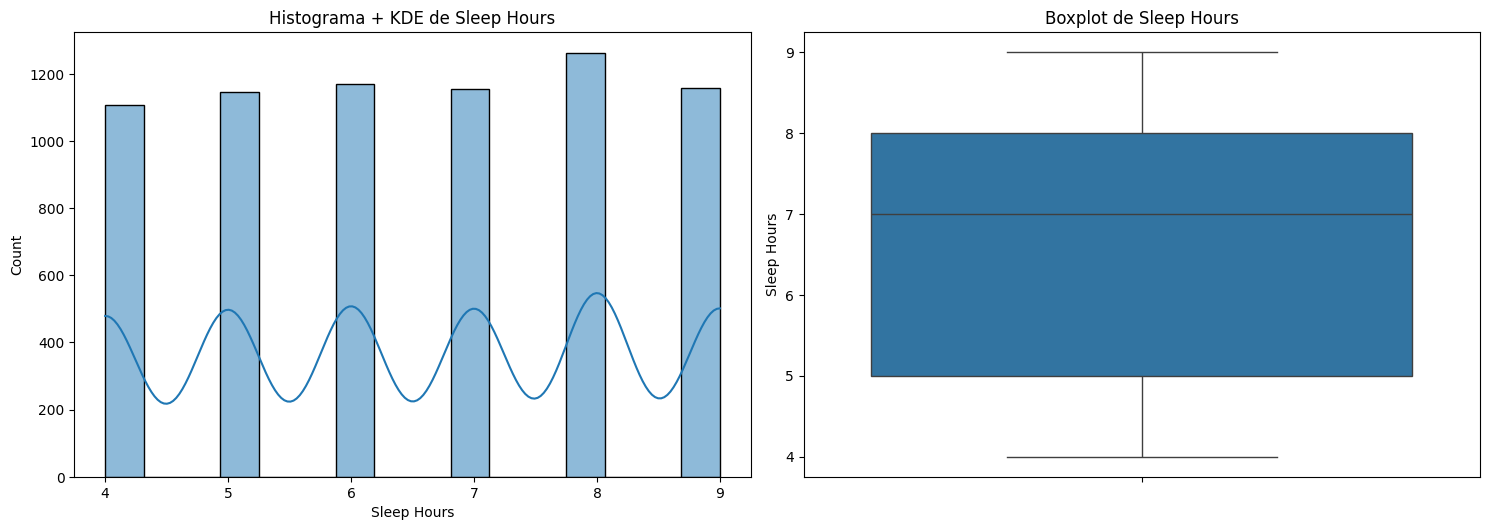

count    7000.000000
mean        6.542000
std         1.696826
min         4.000000
25%         5.000000
50%         7.000000
75%         8.000000
max         9.000000
Name: Sleep Hours, dtype: float64


In [23]:
plot_distribution(X_train, 'Sleep Hours')

La variable numérica 'Sleep Hours', que representa la cantidad de horas que duermen los estudiantes, muestra una distribución ligeramente simétrica con un leve sesgo hacia la izquierda. La media es de aproximadamente 6.54 horas, mientras que la mediana es de 7 horas, lo cual sugiere que la mayoría de los alumnos tiende a dormir más de 6.5 horas por noche.

El histograma con la curva de densidad (KDE) revela una distribución bastante uniforme, con frecuencias similares entre los valores de 4 a 9 horas, aunque destaca un pico en torno a las 8 horas. Esto indica que no hay una única moda clara, sino una distribución amplia dentro del rango. La curva KDE presenta oscilaciones no propias de una distribución normal, lo que puede deberse a la discreción de los datos (valores enteros de horas).

El boxplot, por su parte, muestra que no hay valores atípicos y que los datos se distribuyen de forma compacta entre los 4 y 9 horas. El rango intercuartílico se extiende entre las 5 y 8 horas, donde se concentra el 50% central de las observaciones, lo cual es coherente con la desviación estándar de 1.70 horas.

En conjunto, tanto los gráficos como la descripción numérica sugieren que la variable se distribuye de manera bastante homogénea, sin presencia de valores extremos ni asimetrías marcadas, aunque no se ajusta perfectamente a una distribución normal.

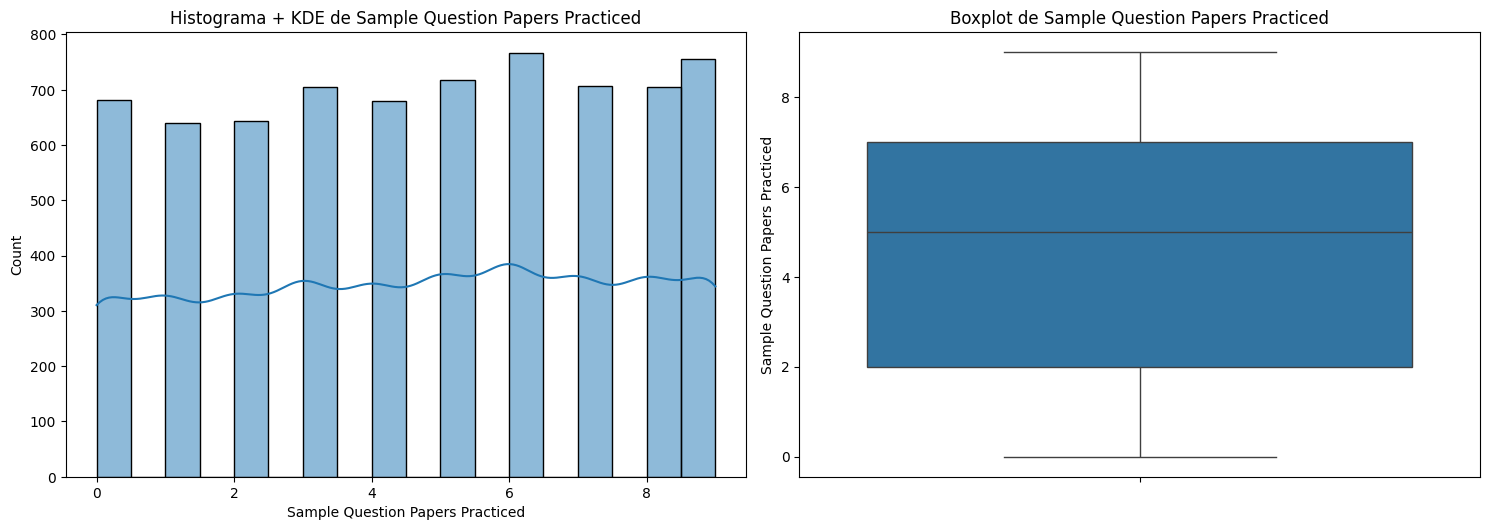

count    7000.000000
mean        4.619714
std         2.867849
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Sample Question Papers Practiced, dtype: float64


In [24]:
plot_distribution(X_train, 'Sample Question Papers Practiced')

La variable 'Sample Question Papers Practiced', que indica la cantidad de exámenes de práctica resueltos por los alumnos, presenta una distribución ligeramente simétrica, aunque se podría considerar ligeramente sesgada a la derecha. La media es de aproximadamente 4.62, mientras que la mediana es de 5, lo que indica que el 50% de los estudiantes resolvió cinco o menos exámenes de práctica. Esto sugiere que la mayoría de los estudiantes se encuentra en un rango medio de práctica, sin una acumulación excesiva en valores bajos ni altos.

La desviación estándar es de 2.87, lo que evidencia una variabilidad moderadamente alta en la cantidad de exámenes resueltos. El rango de valores va desde 0 a 9, y el rango intercuartílico va de 2 a 7, es decir, el 50% central de los estudiantes resolvió entre dos y siete exámenes. Por otro lado, no se observan valores atípicos en el boxplot, lo cual sugiere que el comportamiento de los estudiantes en esta variable es relativamente homogéneo dentro de los límites esperados.

En el histograma, se aprecia una distribución más bien uniforme, con una frecuencia relativamente equilibrada entre los distintos niveles de práctica. La curva KDE es bastante plana, lo cual respalda esta observación: no hay una moda clara ni una concentración fuerte en un valor específico.

En resumen, lo visto indica que los estudiantes tienen patrones diversos en cuanto a la cantidad de exámenes de práctica realizados, pero en general, tienden a resolver entre 2 y 7 de ellos.

#### Correlacion lineal

In [33]:
y_train

9069    82.0
2603    79.0
7738    50.0
1579    81.0
5058    52.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 7000, dtype: float64

<Axes: >

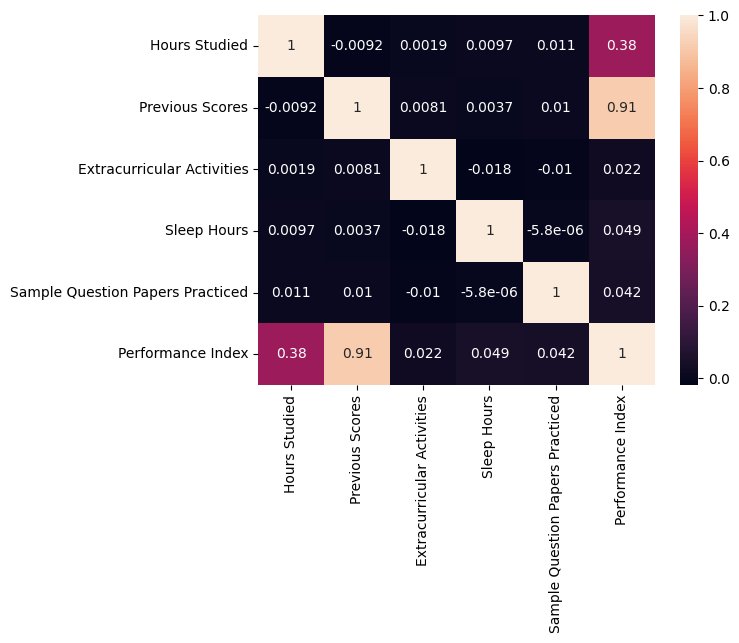

In [103]:
# Se codifica la variable 'Extracurricular activites' para poder realizar la correlacion
X_train['Extracurricular Activities'] = X_train['Extracurricular Activities'].replace('Yes',1).replace('No',0)

sns.heatmap(X_train.assign(**{'Performance Index': y_train}).corr(), annot=True)


En el análisis de correlación mediante el heatmap, se observa que no hay una fuerte correlación lineal entre las distintas variables predictoras, lo que indica baja multicolinealidad en el conjunto de datos. Sin embargo, destaca una fuerte correlación positiva (0.91) entre 'Previous Scores' y 'Performance Index', lo que sugiere que a medida que los puntajes anteriores aumentan, también lo hace el índice de rendimiento. Esta relación positiva podría ser esperada, ya que es razonable pensar que un historial de buenos puntajes esté asociado con un mejor rendimiento en evaluaciones futuras.

## 2. Definición y entrenamiento del modelo.

No hay datos nulos en los datasets pero lo prudente sería realizar algun procedimiento de llenado de datos faltantes en base a X_train ya que si hubiese datos nuevos a predecir, estos podrían contenerlos.

Asimismo, se escalan los datos como paso inicial, para mejorar la robustes del modelo.

In [132]:
def codificar(dataset)-> pd.DataFrame:
    dataset['Extracurricular Activities'] = dataset['Extracurricular Activities'].replace('Yes',1).replace('No',0)
    return dataset

In [138]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(codificar(X_val))
X_test_scaled = scaler.transform(codificar(X_test))

In [137]:
scaler_sub = StandardScaler()
X_train_previous_scores =scaler.fit_transform(X_train[['Previous Scores']])
X_val_previous_scores =scaler.transform(X_val[['Previous Scores']])
X_test_previous_scores =scaler.transform(X_test[['Previous Scores']])

#### Regresión Lineal

A raíz de la correlación lineal anterior que obtuvimos, podemos definir un modelo base de regresión logistica sólo con la variable 'Previous Scores' y luego utilizarlo para contrastar con la red neuronal.

In [142]:
linear_model = LinearRegression()
linear_model.fit(X_train_previous_scores, y_train)
y_val_pred_linear_model = linear_model.predict(X_val_previous_scores)
y_test_pred_linear_model = linear_model.predict(X_test_previous_scores)

In [143]:
# root_mean_squared_error en validación
root_mean_squared_error_val = root_mean_squared_error(y_val, y_val_pred_linear_model)
print("root_mean_squared_error Validación:", root_mean_squared_error_val)

# root_mean_squared_error en test
root_mean_squared_error_test = root_mean_squared_error(y_test, y_test_pred_linear_model)
print("root_mean_squared_error Test:", root_mean_squared_error_test)


print(f"CV-RMSE Val: {(root_mean_squared_error_val / np.mean(y_val)) * 100:.2f}%")  

print(f"CV-RMSE Test: {(root_mean_squared_error_test / np.mean(y_test)) * 100:.2f}%")  

root_mean_squared_error Validación: 7.613378083634984
root_mean_squared_error Test: 7.6957248254957475
CV-RMSE Val: 14.04%
CV-RMSE Test: 13.89%


Por cada predicción, el modelo se equivoca en promedio un 14% respecto al valor medio de las notas.

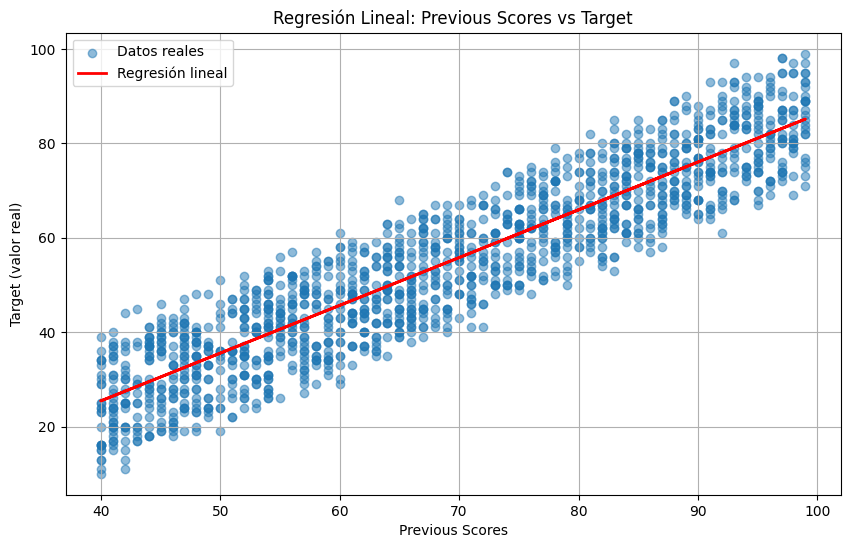

In [144]:
# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X_val['Previous Scores'], y_val, alpha=0.5, label='Datos reales')
plt.plot(X_val['Previous Scores'], y_val_pred_linear_model, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('Previous Scores')
plt.ylabel('Target (valor real)')
plt.title('Regresión Lineal: Previous Scores vs Target')
plt.legend()
plt.grid(True)
plt.show()

Con un modelo base relativamente bueno, podemos ahora establecer una red neuronal con el fin de obtener un valor mejor que este.

#### Red Neuronal

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),  
    tf.keras.layers.Dense(64, activation='relu'),        
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dense(1)            
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
    loss='mse', 
        metrics=[
        tf.keras.metrics.RootMeanSquaredError(name='rmse') 
    ]
)


early_stop = EarlyStopping(
    monitor='val_rmse',
    patience=50,
    restore_best_weights=True
)

history = model.fit(
    np.array(X_train_scaled, dtype=np.float32), np.array(y_train, dtype=np.float32),
    epochs=500,
    batch_size=500,
    callbacks = [early_stop],
    validation_data = (X_val_scaled,y_val),
    verbose=1
)

Epoch 1/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1811.0233 - rmse: 41.5539 - val_loss: 269.9840 - val_rmse: 16.4312
Epoch 2/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 174.6766 - rmse: 13.1262 - val_loss: 75.1146 - val_rmse: 8.6669
Epoch 3/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.4341 - rmse: 7.3971 - val_loss: 26.9838 - val_rmse: 5.1946
Epoch 4/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.9584 - rmse: 4.6537 - val_loss: 13.5684 - val_rmse: 3.6835
Epoch 5/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7998 - rmse: 3.2840 - val_loss: 8.7437 - val_rmse: 2.9570
Epoch 6/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2083 - rmse: 2.8643 - val_loss: 7.5660 - val_rmse: 2.7506
Epoch 7/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0914 - rmse: 2.6626 - val_loss: 6.5165 - val_rmse: 2.5527
Epoch 8/500
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.3801 - rmse: 2.5257 - val_loss: 6.0717 - val_rmse: 2.4641
Epoch 9/500
14/14 ━━━━━━━━━━━━━

In [169]:
test_rmse= model.evaluate(X_test_scaled, y_test, verbose=0)
val_rmse = history.history['val_rmse']

print(f"Val RMSE: {np.mean(val_rmse[:-5])}")
print(f"Test RMSE: {np.mean(test_rmse)}")



Val RMSE: 2.3139781128792536
Test RMSE: 3.118733763694763


In [170]:
print(f"CV-RMSE Val: {np.mean(val_rmse[:-5] / np.mean(y_val)) * 100:.2f}%")  

print(f"CV-RMSE Test: {(np.mean(test_rmse) / np.mean(y_test)) * 100:.2f}%")  

CV-RMSE Val: 4.27%
CV-RMSE Test: 5.63%


## 3. Resultados de la evaluación del modelo. 
Incluyendo métricas de desempeño y visualizaciones relevantes.